# Pandas

## Creating DataFrames

In [2]:
import pandas as pd

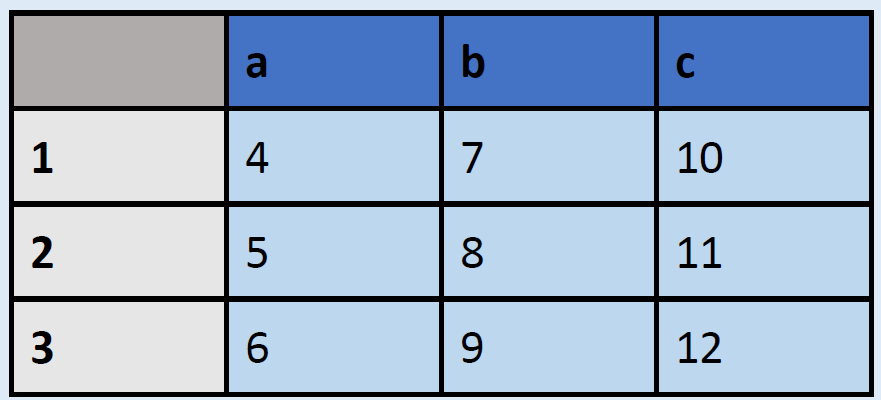

In [3]:
from IPython.display import Image
Image(filename='images/2.png')

In [4]:
df = pd.DataFrame(
    {"a" : [4, 5, 6],
     "b" : [7, 8, 9],
     "c" : [10, 11, 12]},
    index = [1, 2, 3]) 
# Specify values for each column

In [5]:
df = pd.DataFrame(
    [[4, 7, 10],
     [5, 8, 11],
     [6, 9, 12]],
    index=[1, 2, 3],
    columns=['a', 'b', 'c'])
# Specify values for each column

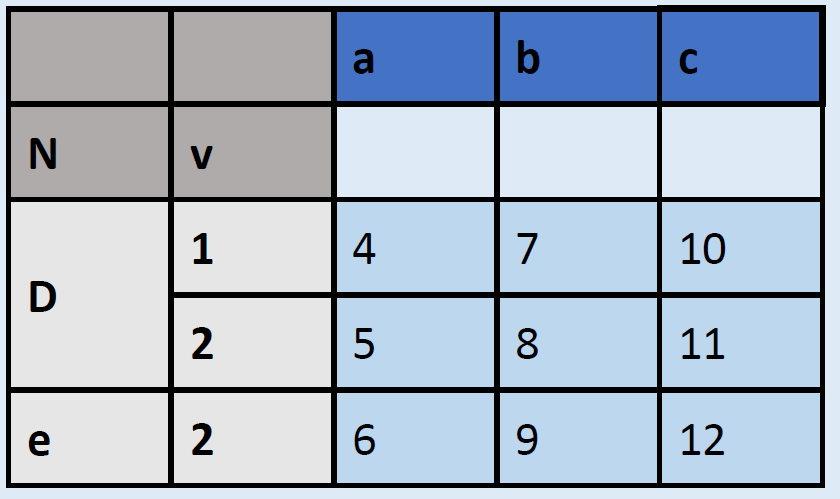

In [6]:
Image(filename='images/3.png')

In [7]:
df = pd.DataFrame(
    {"a" : [4 ,5, 6],
     "b" : [7, 8, 9],
     "c" : [10, 11, 12]},
    index = pd.MultiIndex.from_tuples(
        [('d', 1), ('d',2),
        ('e', 2)], names=['n', 'v']))
# Create DataFrame with a MultiIndex

## Method Chaining

Most pandas methods return a DataFrame so that another pandas method can be applied to the result.
This improves readability of code.

In [38]:
df_chaining = (pd.melt(df)
      .rename (columns={
          'variable':'var',
          'value':'val'})
      .query ('val >= 200')
     )

## Reshaping Data - Change layout, sorting, reindexing, renaming

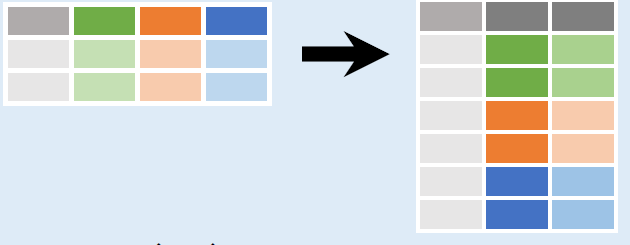

In [39]:
Image(filename='images/4.png')

In [40]:
pd.melt(df) # Gather columns into rows

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


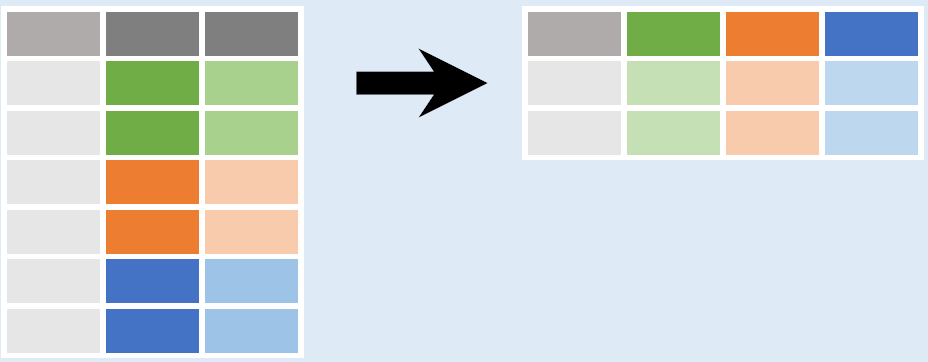

In [41]:
Image(filename='images/5.png')

In [42]:
df_chaining.pivot(columns='var', values='val') # Spread rows into columns

var


In [43]:
df1 = pd.DataFrame({'Nombre': ['Ana', 'Luis', 'Carlos'], 'Edad': [23, 35, 29], 'Ciudad': ['Madrid', 'Barcelona', 'Sevilla']})

In [44]:
df2 = pd.DataFrame({'Producto': ['Manzana', 'Naranja', 'Plátano'], 'Precio': [0.5, 0.75, 0.65], 'Cantidad': [10, 20, 15]})

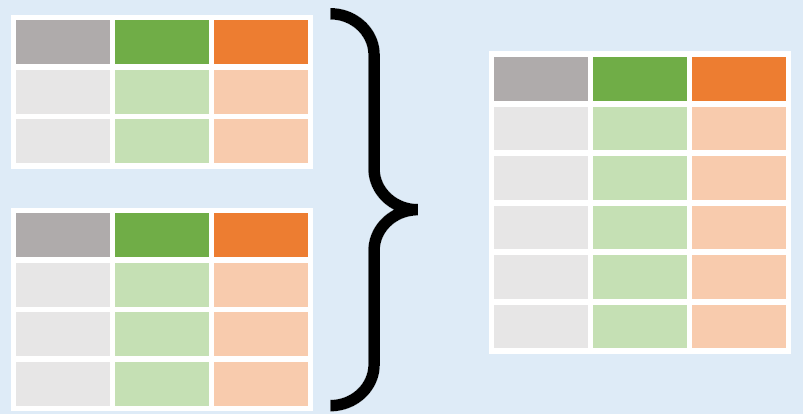

In [45]:
Image(filename='images/6.png')

In [46]:
pd.concat([df1,df2]) # Append rows of DataFrames

,Nombre,Edad,Ciudad,Producto,Precio,Cantidad
0,Ana,23.0,Madrid,NaN,NaN,NaN
1,Luis,35.0,Barcelona,NaN,NaN,NaN
2,Carlos,29.0,Sevilla,NaN,NaN,NaN
0,NaN,NaN,NaN,Manzana,0.50,10.0
1,NaN,NaN,NaN,Naranja,0.75,20.0
2,NaN,NaN,NaN,Plátano,0.65,15.0


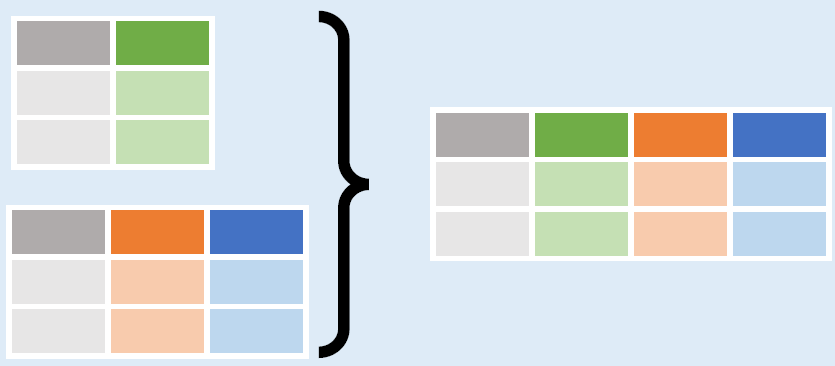

In [47]:
Image(filename='images/7.png')

In [48]:
pd.concat([df1,df2], axis=1) # Append columns of DataFrames

,Nombre,Edad,Ciudad,Producto,Precio,Cantidad
0,Ana,23,Madrid,Manzana,0.50,10
1,Luis,35,Barcelona,Naranja,0.75,20
2,Carlos,29,Sevilla,Plátano,0.65,15


In [49]:
df

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [50]:
df.sort_values('b') # Order rows by values of a column (low to high)

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [51]:
df.sort_values('b', ascending=False) # Order rows by values of a column (high to low)

a  b   c
n v          
e 2  6  9  12
d 2  5  8  11
  1  4  7  10

In [52]:
df.rename(columns = {'y':'year'}) # Rename the columns of a DataFrame

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [53]:
df.sort_index() # Sort the index of a DataFrame

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [54]:
df.drop(columns=['a', 'c']) # Drop columns from DataFrame

b
n v   
d 1  7
  2  8
e 2  9

## Subset Observations - rows

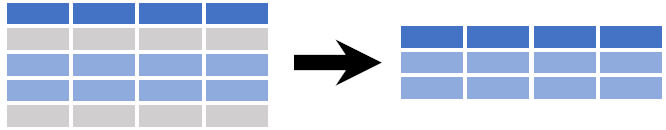

In [55]:
Image(filename='images/8.png')

In [56]:
df[df.b > 7] # Extract rows that meet logical criteria.

,,a,b,c
n,v,,,
d,2,5,8,11
e,2,6,9,12


In [57]:
df.drop_duplicates() # Remove duplicate rows (only considers columns).

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [58]:
df.sample (frac=0.5) # Randomly select fraction of rows.

,,a,b,c
n,v,,,
e,2,6,9,12
d,2,5,8,11


In [74]:
df = pd.DataFrame(
    {"a" : [4 ,5, 6],
     "b" : [7, 8, 9],
     "c" : [10, 11, 12]},
    index = pd.MultiIndex.from_tuples(
        [('d', 1), ('d',2),
        ('e', 2)], names=['n', 'v']))
# Create DataFrame with a MultiIndex

In [75]:
df.sample (n=3) # Randomly select n rows.

,,a,b,c
n,v,,,
d,2,5,8,11
e,2,6,9,12
d,1,4,7,10


In [90]:
df.nlargest (2, 'a') # Select and order top n entries.

,,a,b,c
n,v,,,
e,2,6,9,12
d,2,5,8,11


In [92]:
df.nsmallest (2, 'c') # Select and order bottom n entries.

a  b   c
n v          
d 1  4  7  10
  2  5  8  11

In [79]:
df.head (2) # Select first n rows.

a  b   c
n v          
d 1  4  7  10
  2  5  8  11

In [80]:
df.tail (2) # Select last n rows.

,,a,b,c
n,v,,,
d,2,5,8,11
e,2,6,9,12


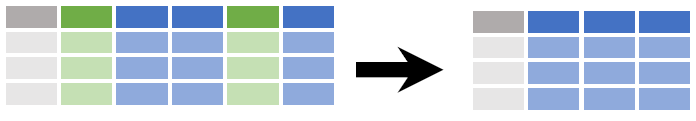

In [93]:
Image(filename='images/9.png')

Use **df.loc[]** and **df.iloc[]** to select only rows, only columns or both.
Use **df.at[]** and **df.iat[]** to access a single value by row and column.
First index selects rows, second index columns.

In [94]:
df.iloc [10:20] # Select rows 10-20.

,,a,b,c
n,v,,,


In [ ]:
df.iloc [:, [1 , 2, 5]] # Select columns in positions 1, 2 and 5 (first column is 0).

In [ ]:
df.loc [:, 'x2' :'x4'] # Select all columns between x2 and x4 (inclusive).

In [ ]:
df.loc [df['a'] > 10, ['a’, 'c]] # Select rows meeting logical condition, and only the specific columns .

In [98]:
df.iat [1, 2] # Access single value by index

np.int64(11)

In [ ]:
df.at [4, 'A'] # Access single value by label

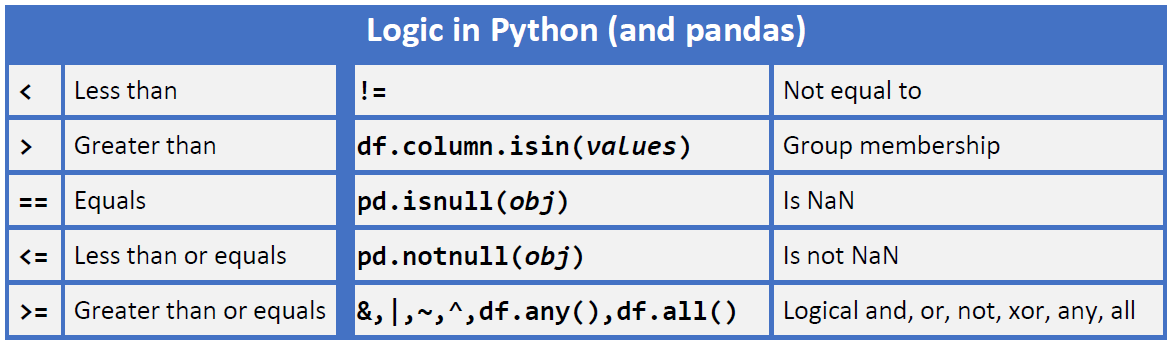

In [101]:
Image(filename='images/10.png')

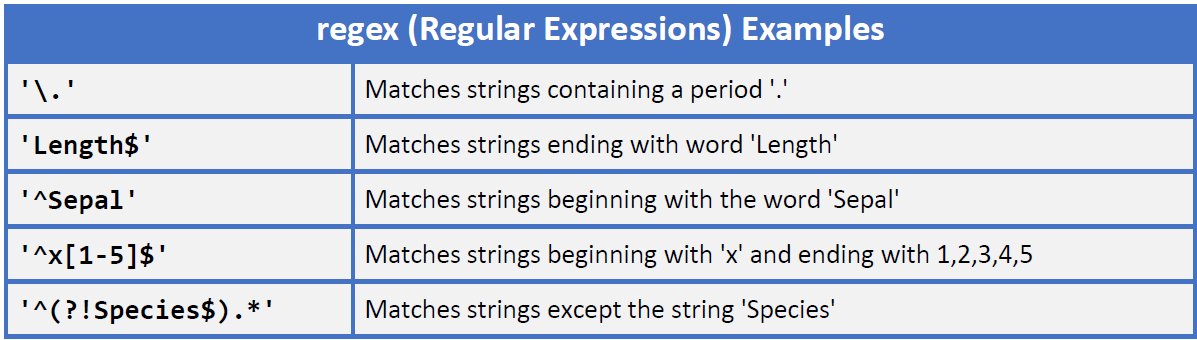

In [102]:
Image(filename='images/11.png')

## Summarize Data

In [8]:
df['a'].value_counts() # Count number of rows with each unique value of variable

a
4    1
5    1
6    1
Name: count, dtype: int64

In [109]:
len(df) # of rows in DataFrame

3

In [111]:
df.shape # Tuple of # of rows, # of columns in DataFrame.

(3, 3)

In [9]:
df['a'].nunique() # of distinct values in a column.

3

In [108]:
df.describe() # Basic descriptive and statistics for each column (or GroupBy).

,a,b,c
count,3.0,3.0,3.0
mean,5.0,8.0,11.0
std,1.0,1.0,1.0
min,4.0,7.0,10.0
25%,4.5,7.5,10.5
50%,5.0,8.0,11.0
75%,5.5,8.5,11.5
max,6.0,9.0,12.0


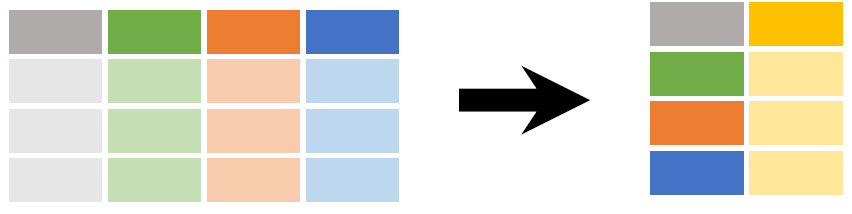

In [112]:
Image(filename='images/12.png')

pandas provides a large set of **summary functions** that operate on different kinds of pandas objects ( DataFrame columns, Series, GroupBy , Expanding and Rolling (see below)) and produce single values for each of the groups . When applied to a DataFrame, the result is returned as a pandas Series for each column. Examples:

In [ ]:
sum() # Sum values of each object

In [ ]:
count() # Count non-NA/null values of each object

In [ ]:
median() # Median value of each object

In [ ]:
quantile([0.25,0.75]) # Quantiles of each object.

In [ ]:
apply(function) # Apply function to each object

In [ ]:
min() # Minimum value in each object.

In [ ]:
max() # Maximum value in each object.

In [ ]:
mean() # Mean value of each object.

In [ ]:
var() # Variance of each object.

In [ ]:
std() # Standard deviation of each object.

## Handling Missing Data

In [116]:
df.dropna() # Drop rows with any column having NA/null data.

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [118]:
df.fillna (0) # Replace all NA/null data with value.

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

## Make New Columns

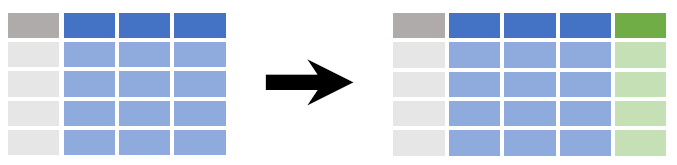

In [120]:
Image(filename='images/14.png')

In [ ]:
df.assign(Area=lambda df : df.Length*df.Height) # Compute and append one or more new columns.

In [ ]:
df['Volume'] = df.Length*df.Height*df.Depth # Add single column.

In [ ]:
pd.qcut(df.col , n, labels=False) # Bin column into n buckets.

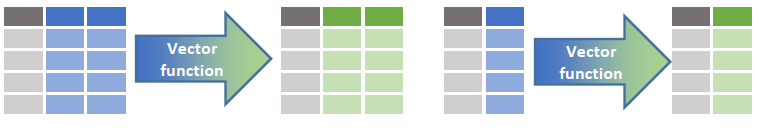

In [122]:
Image(filename='images/15.png')

pandas provides a large set of vector functions that operate on all columns of a DataFrame or a single selected column (a pandas Series). These functions produce vectors of values for each of the columns, or a single Series for the individual Series. Examples:

In [ ]:
max(axis=1) # Element wise max.

In [ ]:
min(axis=1) # Element wise min.

In [ ]:
clip(lower=-10,upper=10) # Trim values at input thresholds

In [ ]:
abs() # Absolute value.

## Combine Data Sets

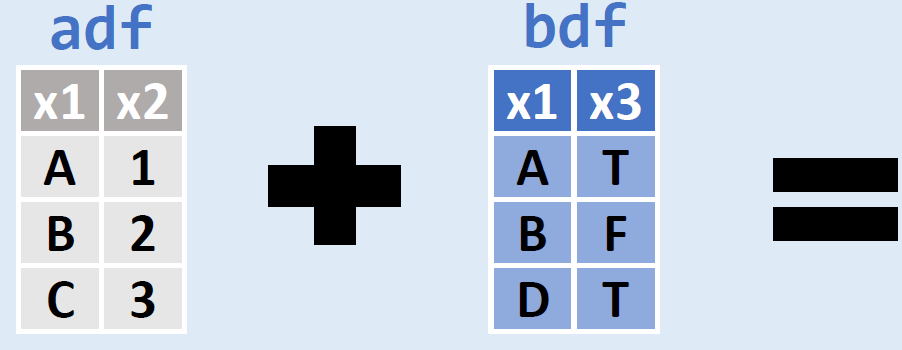

In [124]:
Image(filename='images/16.png')

In [136]:
adf = pd.DataFrame(
    {"x1" : ['A', 'B', 'C'],
     "x2" : [1, 2, 3]})

In [137]:
bdf = pd.DataFrame(
    {"x1" : ['A', 'B', 'D'],
     "x3" : ['T', 'F', 'T']})

### Standard Joins

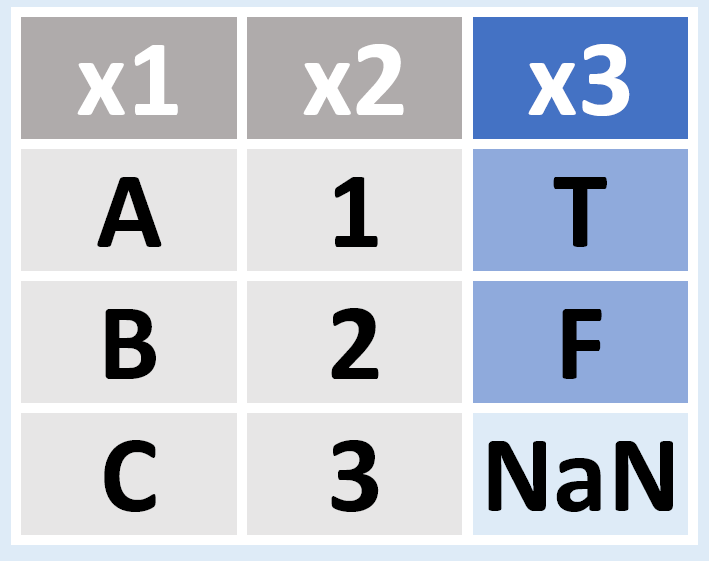

In [125]:
Image(filename='images/17.png')

In [138]:
pd.merge(adf, bdf,
         how='left', on='x1')
# Join matching rows from bdf to adf

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


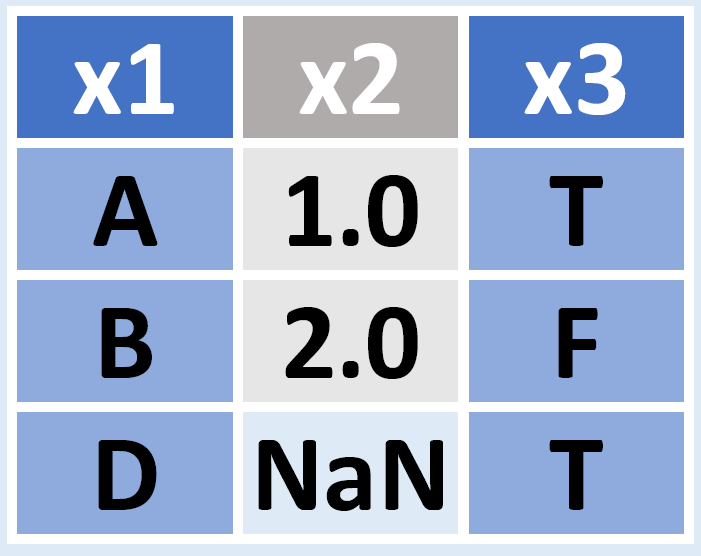

In [126]:
Image(filename='images/18.png')

In [139]:
pd.merge(adf, bdf,
         how='right', on='x1')
# Join matching rows from adf to bdf

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


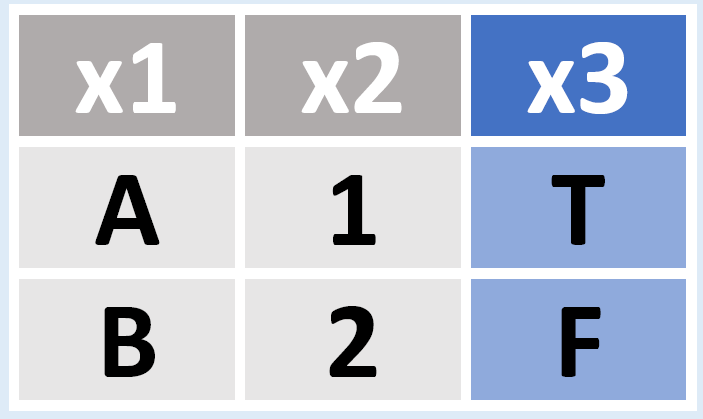

In [127]:
Image(filename='images/19.png')

In [140]:
pd.merge(adf, bdf,
         how='inner', on='x1')
# Join data. Retain only rows in both sets

,x1,x2,x3
0,A,1,T
1,B,2,F


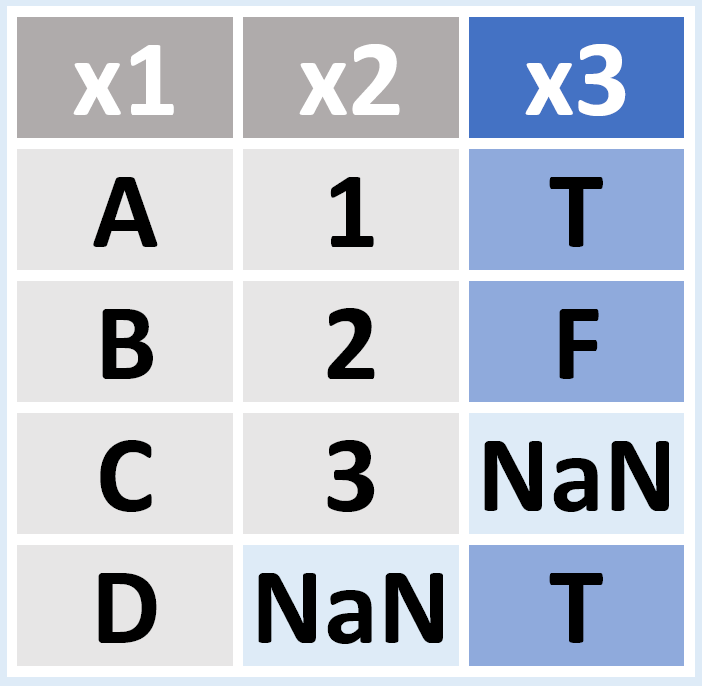

In [128]:
Image(filename='images/20.png')

In [141]:
pd.merge(adf, bdf,
         how='outer', on='x1')
# Join data. Retain all, values all

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


### Filtering Joins

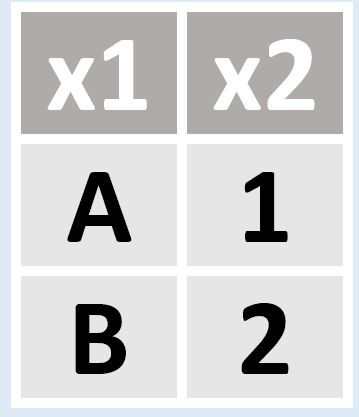

In [129]:
Image(filename='images/21.png')

In [142]:
adf[adf.x1.isin(bdf.x1)] # All rows in adf that have a match in bdf

,x1,x2
0,A,1
1,B,2


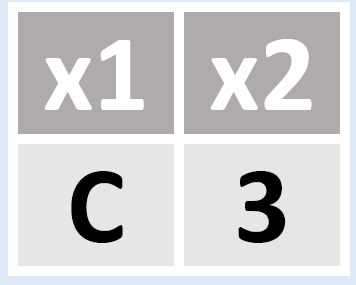

In [130]:
Image(filename='images/22.png')

In [143]:
adf[~adf.x1.isin(bdf.x1)] # All rows in adf that do not have a match in bdf

,x1,x2
2,C,3


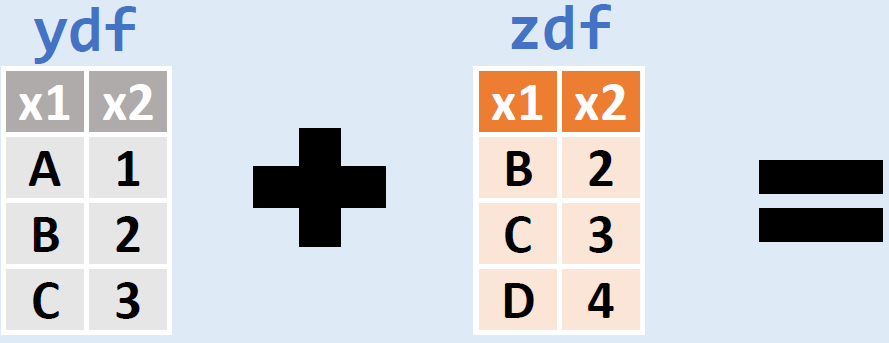

In [131]:
Image(filename='images/23.png')

In [144]:
ydf = pd.DataFrame(
    {"x1" : ['A', 'B', 'C'],
     "x2" : [1, 2, 3]})

In [145]:
zdf = pd.DataFrame(
    {"x1" : ['B', 'C', 'D'],
     "x2" : [2, 2, 3]})

### Self-like Operations

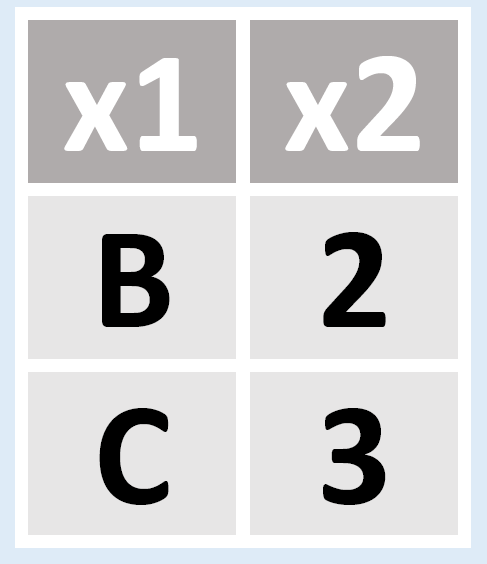

In [132]:
Image(filename='images/24.png')

In [146]:
pd.merge(ydf, zdf) # Rows that appear in both ydf and zdf (Intersection).

,x1,x2
0,B,2


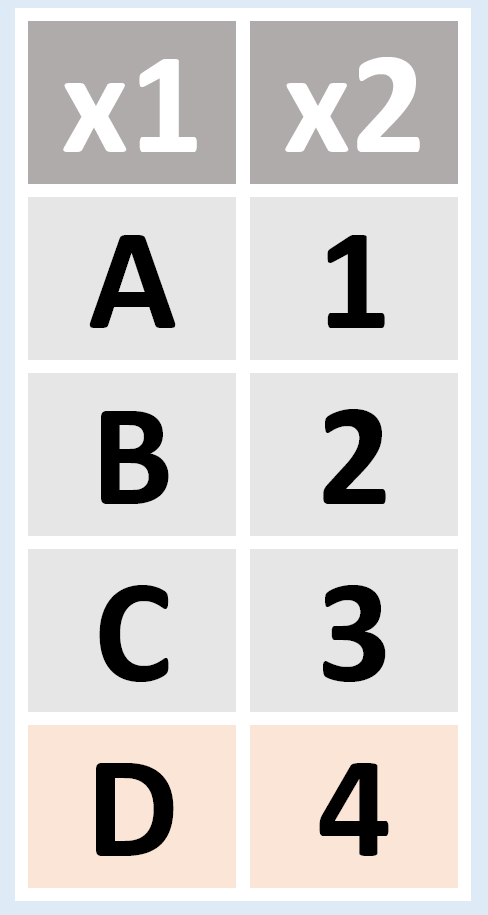

In [133]:
Image(filename='images/25.png')

In [147]:
pd.merge(ydf, zdf, how='outer') # Rows that appear in either or both ydf and zdf (Union).

,x1,x2
0,A,1
1,B,2
2,C,2
3,C,3
4,D,3


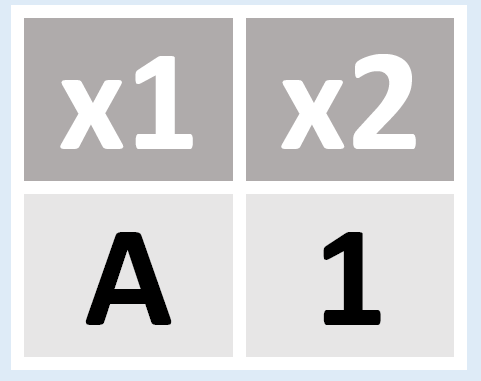

In [134]:
Image(filename='images/26.png')

In [148]:
pd.merge(ydf, zdf, how='outer',
         indicator=True)
.query('_merge == "left_only"')
.drop(columns=['_merge'])
# Rows that appear in ydf but not zdf (Setdiff)

SyntaxError: invalid syntax (958408363.py, line 3)

## Group Data

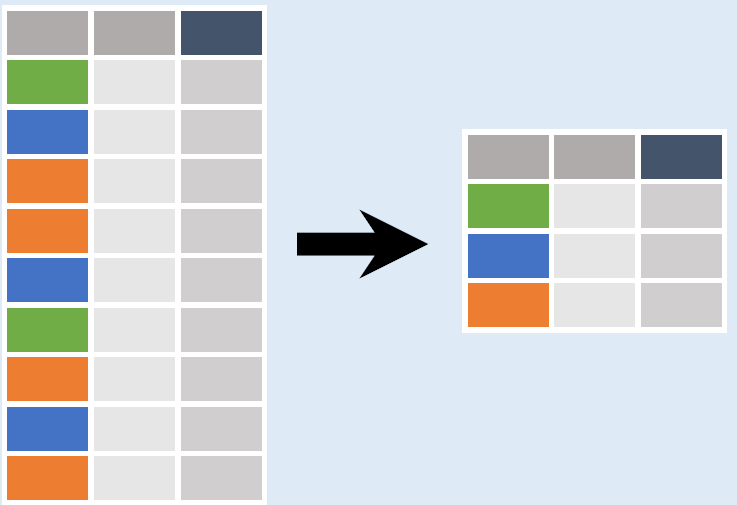

In [152]:
Image(filename='images/13.png')

In [154]:
df.groupby(by='a') # Return a GroupBy object, grouped by values in column named " col

In [ ]:
df.groupby(level='ind') # Return a GroupBy object, grouped by values in index level named ind

All of the summary functions listed above can be applied to a group. Additional GroupBy functions:

In [ ]:
size() # Size of each group.

In [ ]:
agg(function) # Aggregate group using function.

The examples below can also be applied to groups. In this case, the function is applied on a per-group basis, and the returned vectors are of the length of the original DataFrame

In [ ]:
shift(1) # Copy with values shifted by 1.

In [ ]:
shift(-1) # Copy with values lagged by 1.

In [ ]:
rank(method='dense') # Ranks with no gaps.

In [ ]:
rank(method='min') # Ranks. Ties get min rank.

In [ ]:
rank(pct=True) # Ranks rescaled to interval [0, 1].

In [ ]:
rank(method='first') # Ranks. Ties go to first value.

In [ ]:
cumsum() # Cumulative sum.

In [ ]:
cummax() # Cumulative max.

In [ ]:
cummin() # Cumulative min.

In [ ]:
cumprod() # Cumulative product.

## Windows

In [158]:
df.expanding() # Return an Expanding object allowing summary functions to be applied cumulatively.

Expanding [min_periods=1,axis=0,method=single]

In [162]:
df.rolling (2) # Return a Rolling object allowing summary functions to be applied to windows of length n.

Rolling [window=2,center=False,axis=0,method=single]

## Plotting

<Axes: ylabel='Frequency'>

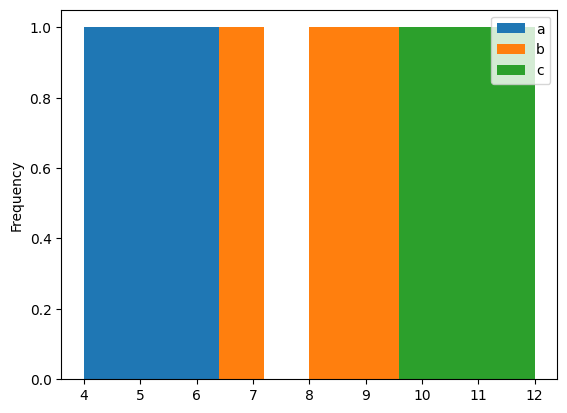

In [163]:
df.plot.hist() # Histtogram for each column

<Axes: xlabel='a', ylabel='b'>

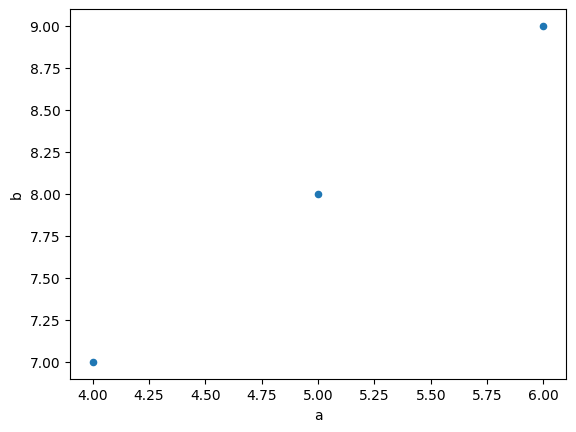

In [166]:
df.plot.scatter(x='a',y='b') # Scatter chart using pairs of points